In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
import os

from datetime import timedelta, datetime, date

In [53]:
def to_date(x):
    date_str = x.strip().split()[0].split('-')
    return date(int(date_str[0]), int(date_str[1]), int(date_str[2]))

In [3]:
# print(os.listdir("../vanessatorres/desktop/kickstarter-projects"))
os.listdir('data')

['data_nobadrows.csv',
 'all_data.csv',
 'ks-projects-201801.csv',
 'ks-projects-201612.csv']

In [8]:
df_ks16 = pd.read_csv("data/data_nobadrows.csv")
df_ks16.info()
# df_ks16.head(n=3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701506 entries, 0 to 701505
Data columns (total 14 columns):
Unnamed: 0       701506 non-null int64
ID               701506 non-null int64
name             701500 non-null object
category         701506 non-null object
main_category    701506 non-null object
currency         701506 non-null object
deadline         701506 non-null object
goal             701506 non-null float64
launched         701506 non-null object
pledged          701506 non-null float64
state            701506 non-null object
backers          701506 non-null int64
country          701506 non-null object
usd pledged      693919 non-null float64
dtypes: float64(3), int64(3), object(8)
memory usage: 74.9+ MB


In [6]:
# df_ks16.drop(['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'], axis=1, inplace=True)

In [9]:
df_ks16.columns = [col.strip() for col in df_ks16.columns]
# cols = df_ks16.columns.tolist()
# for entry in np.arange(0,len(cols),1):
#     cols[entry] = cols[entry].rstrip()
# df_ks16.columns = cols
# df_ks16.columns

In [10]:
df_ks16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701506 entries, 0 to 701505
Data columns (total 14 columns):
Unnamed: 0       701506 non-null int64
ID               701506 non-null int64
name             701500 non-null object
category         701506 non-null object
main_category    701506 non-null object
currency         701506 non-null object
deadline         701506 non-null object
goal             701506 non-null float64
launched         701506 non-null object
pledged          701506 non-null float64
state            701506 non-null object
backers          701506 non-null int64
country          701506 non-null object
usd pledged      693919 non-null float64
dtypes: float64(3), int64(3), object(8)
memory usage: 74.9+ MB


In [25]:
df_ks16[['goal', 'pledged', 'usd pledged', 'backers']] =\
    df_ks16[['goal', 'pledged', 'usd pledged', 'backers']].apply(pd.to_numeric, errors='coerce')
df_ks16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701506 entries, 0 to 701505
Data columns (total 14 columns):
Unnamed: 0       701506 non-null int64
ID               701506 non-null int64
name             701500 non-null object
category         701506 non-null object
main_category    701506 non-null object
currency         701506 non-null object
deadline         701506 non-null object
goal             701506 non-null float64
launched         701506 non-null object
pledged          701506 non-null float64
state            701506 non-null object
backers          701506 non-null int64
country          701506 non-null object
usd pledged      693919 non-null float64
dtypes: float64(3), int64(3), object(8)
memory usage: 74.9+ MB


In [28]:
df_ks16['state'].value_counts()
# acc_states = ['failed', 'successful', 'live', 'undefined', 'suspended']

failed        365805
successful    246921
canceled       71111
live            7227
undefined       7117
suspended       3325
Name: state, dtype: int64

In [29]:
acc_df_ks16 =df_ks16[df_ks16['state'].isin(acc_states)]

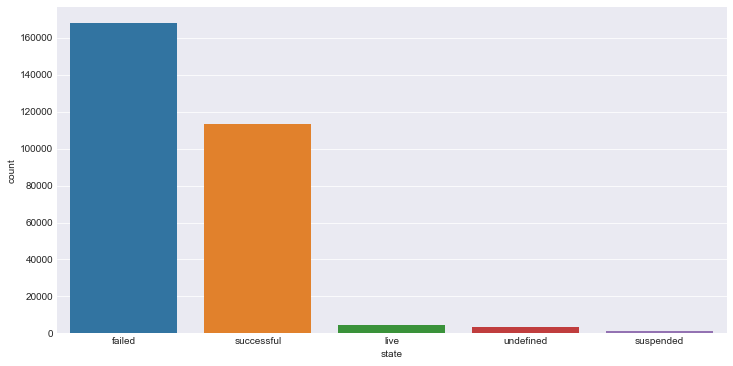

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x='state', data=acc_df_ks16)

<function matplotlib.pyplot.tight_layout>

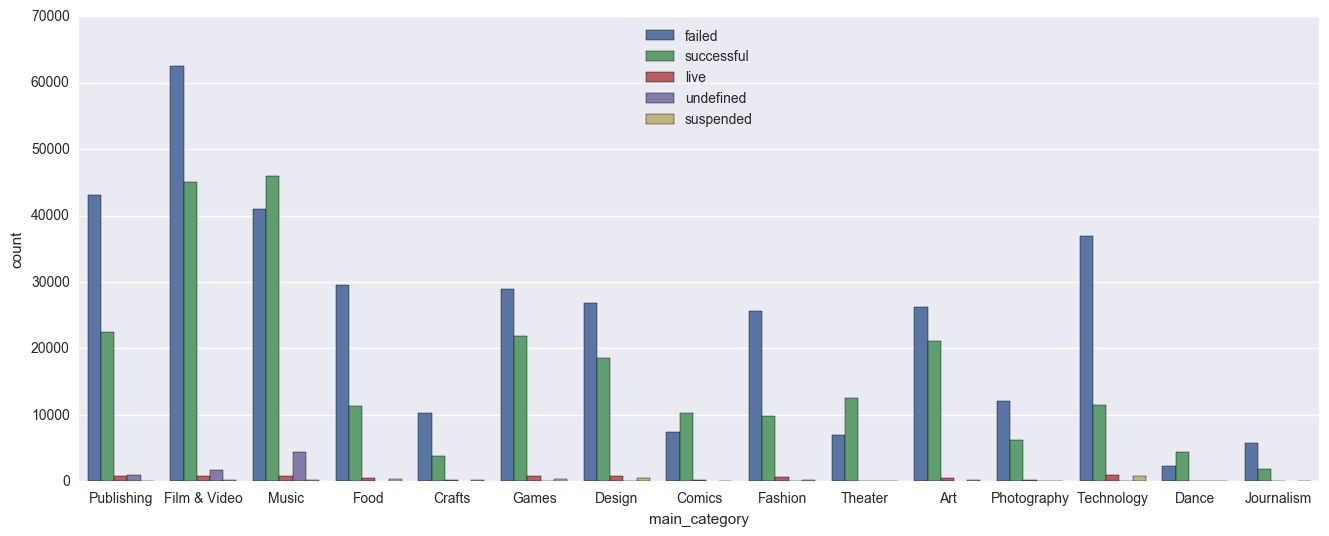

In [30]:
plt.figure(figsize=(16,6))
sns.countplot(x='main_category', data=acc_df_ks16, hue='state')
plt.legend(loc='upper center')
plt.tight_layout

<function matplotlib.pyplot.tight_layout>

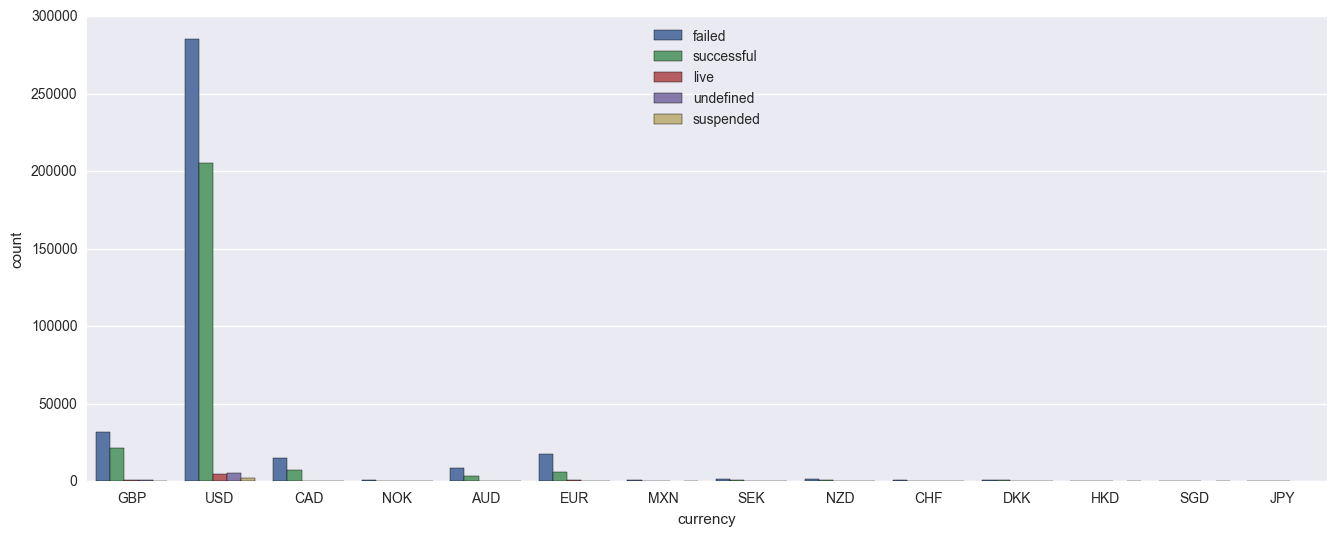

In [31]:
plt.figure(figsize=(16,6))
sns.countplot(x='currency', data=acc_df_ks16, hue='state')
plt.legend(loc='upper center')
plt.tight_layout

In [32]:
df_successfail = acc_df_ks16[(acc_df_ks16['state'] == 'failed') |(acc_df_ks16['state'] == 'successful')]

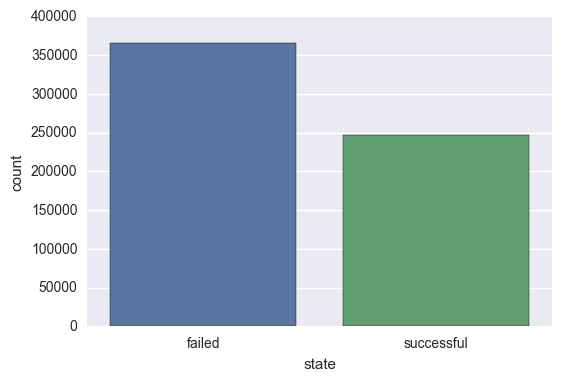

In [34]:
sns.countplot(x='state', data=df_successfail)

In [72]:
df_successfail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612726 entries, 0 to 701505
Data columns (total 14 columns):
Unnamed: 0       612726 non-null int64
ID               612726 non-null int64
name             612722 non-null object
category         612726 non-null object
main_category    612726 non-null int64
currency         612726 non-null object
deadline         612726 non-null object
goal             612726 non-null float64
launched         612726 non-null object
pledged          612726 non-null float64
state            612726 non-null float64
backers          612726 non-null int64
country          612726 non-null object
usd pledged      612306 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 70.1+ MB


In [75]:
# df_successfail[['deadline', 'launched']] = \
#     df_successfail[['deadline', 'launched']].apply(pd.to_datetime, errors='coerce', infer_datetime_format=True)
df_successfail['deadline'] = df_successfail['deadline'].apply(to_date).astype(date)
df_successfail['launched'] = df_successfail['launched'].apply(to_date).astype(date)

AttributeError: 'datetime.date' object has no attribute 'strip'

In [82]:
df_successfail['length'] = (df_successfail['deadline'] - df_successfail['launched']).sample(10)

/Users/travis/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [83]:
df_successfail['length'] = df_successfail['deadline'] - df_successfail['launched']

/Users/travis/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [35]:
# def daysfinder(timedelta):
#     numdays = timedelta.days
#     return numdays

In [85]:
df_successfail['length'] = df_successfail['length'].apply(lambda x: x.days)

/Users/travis/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [86]:
df_successfail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612726 entries, 0 to 701505
Data columns (total 15 columns):
Unnamed: 0       612726 non-null int64
ID               612726 non-null int64
name             612722 non-null object
category         612726 non-null object
main_category    612726 non-null int64
currency         612726 non-null object
deadline         612726 non-null object
goal             612726 non-null float64
launched         612726 non-null object
pledged          612726 non-null float64
state            612726 non-null float64
backers          612726 non-null int64
country          612726 non-null object
usd pledged      612306 non-null float64
length           612726 non-null int64
dtypes: float64(4), int64(5), object(6)
memory usage: 74.8+ MB


In [87]:
# df_successfail = df_successfail[df_successfail['goal'] < 5000000]

<function matplotlib.pyplot.tight_layout>

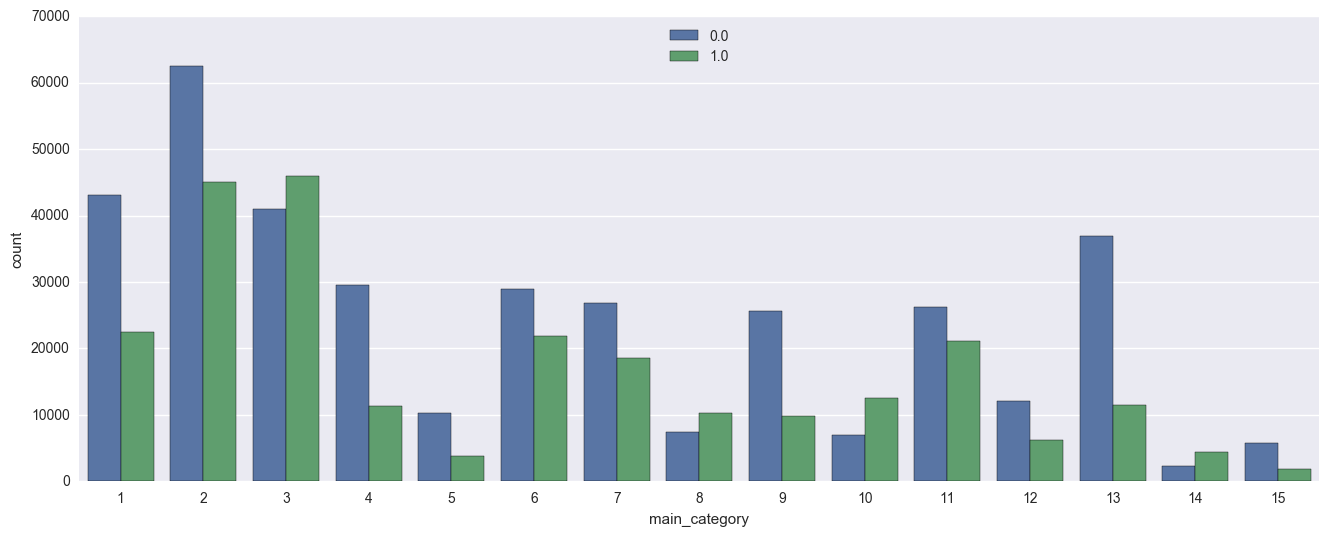

In [88]:
plt.figure(figsize=(16,6))
sns.countplot(x='main_category', data=df_successfail, hue='state')
plt.legend(loc='upper center')
plt.tight_layout

In [89]:
df_dummies16 = pd.get_dummies(data=df_successfail['state'], drop_first=True)

In [90]:
df_successfail['state'] = df_dummies16

/Users/travis/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [91]:
df_successfail['main_category'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [112]:
df_successfail.sample(3).T

,256132,529958,609705
Unnamed: 0,256848,207113,286860
ID,598267658,2055471626,52936111
name,"Best Thing You'll Ever Do, a Miniseries",CIAN,Barstow System and Mini Bar: Bike Tools from M...
category,Webseries,Design,Product Design
main_category,2,7,7
currency,USD,GBP,USD
deadline,2016-05-21,2014-08-26,2016-02-12
goal,15000,1000,20000
launched,2016-04-20,2014-07-22,2016-01-04
pledged,31632,7,22170


In [92]:
# I am not sure why you are doing this
# category_dict = {
#     'Publishing' :1,
#     'Film & Video' :2,
#     'Music' :3,
#     'Food' :4,
#     'Crafts' :5,
#     'Games' :6,
#     'Design' :7,
#     'Comics' :8,
#     'Fashion' :9,
#     'Theater' :10,
#     'Art' :11,
#     'Photography' :12,
#     'Technology' :13,
#     'Dance' :14,
#     'Journalism' :15
# }
# df_successfail['main_category'] = df_successfail['main_category'].replace(category_dict)

In [113]:
## create dummu varaibles
df_2 = df_successfail.copy()
for cat in df_successfail['main_category'].unique():
    df_2["main_cat::{}".format(cat)] = df_successfail['main_category']  == cat
    

In [116]:
## or just use
#pd.get_dummies()

In [ ]:
df_successfail['main_category']

In [114]:
df_2.sample(3).T

,601929,624892,563329
Unnamed: 0,279084,302047,240484
ID,489560974,608125543,293088173
name,The world’s most beautiful story told on a bra...,The Point at Which Time Stands Still,'WE ARE THE PEOPLE' - LIVES WITHOUT BOUNDARIES?
category,Crafts,Painting,Photography
main_category,5,11,12
currency,USD,USD,GBP
deadline,2014-02-02,2010-11-09,2013-04-23
goal,10000,1000,22422
launched,2013-12-19,2010-10-10,2013-03-27
pledged,90,1089,11


In [93]:
features = ['main_category', 'goal', 'backers', 'length']
target = ['state']

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X = df_successfail[features]
y = df_successfail[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [100]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(C=.8, n_jobs=-1)

In [101]:
regressor.fit(X_train, y_train)

LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [104]:
predictions = regressor.predict(X_test)

In [103]:
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.89      0.95      0.92     42021
          1       0.92      0.82      0.87     28246

avg / total       0.90      0.90      0.90     70267



In [55]:
print(confusion_matrix(y_test, predictions))

[[40034  1987]
 [ 4974 23272]]
